In [1]:
%pylab inline

import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import matplotlib
import pickle
import scipy
import time
import os
import warnings
from collections import namedtuple
# import rnaseqTools

sns.set_style('ticks')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import neurom as nm
from neurom import viewer
from neurom.view import matplotlib_utils

In [3]:
# define data format
from collections import namedtuple
RNAseqData = namedtuple('RNAseqData', 'counts genes cells clusterIDs clusterLabels clustergroupIDs '
                                      'clusterColors clusterNames clustergroupNames cellnames mappingrates')

# create the color table for neuron clusters.
clusterColors_exc_table=np.array(['#98A14E', 
                              '#008000', '#2E8B57', '#96C390', '#6FBC1E', '#6D9269', 
                              '#90EE90', '#224700', '#228B22', '#00FF7F', '#ADD8E6',  #'#7CFC00',#  10
                              '#4666A6', '#1E90FF', '#B4BA77', '#1B655D', '#008B8B', 
                              '#00CED1', '#20B2AA', '#66CDAA', '#00FF00',])   ### greenish colors for excitatory neurons 
                              
clusterColors_inh_table = np.array(['#DDACC9', '#FF88AD', '#DD8091', '#F08E98', '#FF7290', '#FF8C97',
                              '#FFA388', '#C77963', '#7E0ACB', '#9440F3', '#9611B6', '#9900B3',
                              '#7A0099', '#AA4DB5', '#A720FF', '#AB1DFF', '#FF5FCD', '#FF4DC1',
                              '#B09FFF', '#BD3D9A', '#992E81', '#F70CF3', '#FF00FF', '#AB379C',
                              '#B3128A', '#7779BF', '#626EB8', '#FFFF00', '#FF8011', '#FF9F2C',
                              '#FFB307', '#FFBF09', '#BFAF00', '#FFB22B', '#D9C566', '#BE8652',      ### redish colors for inhibttory neurons.
                              ])

# Import the morphological data...

In [4]:
dataMorph = pd.read_csv('./dataMorph/morphFeatMatrix.csv',index_col=0)
dataMorph

,cellTypeID,allBasalDenLen,apicalLen,axonDist,axonLen,centroid_allBasalDenY,centroid_apicalY,centroid_axonY,height,lengthFractionAboveSoma_apical,...,totalApicalVolume,totalAxonLength,totalAxonVolume,totalBasalLength,totalBasalSurfaceArea,totalBasalVolume,totalLen,totalSurfaceArea,totalVolume,totalAxonSurfaceArea
B112,2,1573.569723,2471.737105,2.492281,679.656167,-40.073408,182.565365,-81.289321,784.30,0.954818,...,1452.852726,679.656132,112.952230,1573.569670,3379.445353,627.588079,4724.962995,10413.655551,2229.522436,982.193300
B15,2,768.102720,2121.989931,0.919874,179.515596,-18.156018,215.944276,-75.341351,683.30,1.000000,...,1153.040061,179.515594,92.504333,768.102694,1970.483373,435.120017,3069.608247,7801.776757,1711.248169,456.811553
B154,2,3573.866010,2851.954476,0.000000,189.843234,-65.531695,129.438833,-72.495039,48.57,1.000000,...,8388.612917,189.837616,279.842268,3573.845681,20466.481440,9415.182072,6615.663719,38444.124952,18318.863781,817.057703
B224,2,1184.024662,598.342024,0.000000,237.092296,46.424543,-20.543718,-63.791752,73.11,0.138517,...,400.311993,237.092293,88.655462,1184.024666,3211.915594,1066.233344,2019.458982,5419.707400,1584.784306,513.944696
B55,2,967.222799,2026.918673,0.000000,47.808631,-33.121463,270.450831,-19.206011,794.80,1.000000,...,1154.282421,47.808636,12.631419,967.222775,2584.927087,581.908382,3041.950102,7672.768624,1759.702103,87.113241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s722,1,1390.448694,1203.991459,0.000000,121.033303,-80.376683,127.456794,-57.690645,681.25,0.992922,...,1082.225143,121.033295,45.257749,1390.448693,3692.432813,884.374916,2715.473456,7828.057061,2050.223439,262.363755
s725,1,2161.712022,2429.440311,0.000000,66.087886,-67.492119,367.272940,-32.398086,1243.40,1.000000,...,2316.335561,66.087875,48.232372,2161.712045,4739.931023,874.023682,4657.240219,11984.399768,3257.442440,189.744714
s727,1,3309.298558,4598.691892,0.000000,112.109683,-74.294985,308.267710,-50.322418,1253.20,0.950877,...,4578.785066,112.109673,88.453375,3309.298612,6698.096619,1170.862221,8020.100133,20223.157877,7778.147988,347.307096
s732,1,4575.900822,2557.163073,NaN,NaN,8.578133,199.092911,NaN,656.86,1.000000,...,1461.848069,0.000000,0.000000,4575.900916,8849.595514,1460.721038,NaN,14831.570436,2951.127988,0.000000


In [5]:
cellTypeID = dataMorph['cellTypeID']
dataMorph = dataMorph.drop('cellTypeID',axis=1)

In [6]:
dataMorph

,allBasalDenLen,apicalLen,axonDist,axonLen,centroid_allBasalDenY,centroid_apicalY,centroid_axonY,height,lengthFractionAboveSoma_apical,lengthFractionAboveSoma_axon,...,totalApicalVolume,totalAxonLength,totalAxonVolume,totalBasalLength,totalBasalSurfaceArea,totalBasalVolume,totalLen,totalSurfaceArea,totalVolume,totalAxonSurfaceArea
B112,1573.569723,2471.737105,2.492281,679.656167,-40.073408,182.565365,-81.289321,784.30,0.954818,0.02353,...,1452.852726,679.656132,112.952230,1573.569670,3379.445353,627.588079,4724.962995,10413.655551,2229.522436,982.193300
B15,768.102720,2121.989931,0.919874,179.515596,-18.156018,215.944276,-75.341351,683.30,1.000000,0.00000,...,1153.040061,179.515594,92.504333,768.102694,1970.483373,435.120017,3069.608247,7801.776757,1711.248169,456.811553
B154,3573.866010,2851.954476,0.000000,189.843234,-65.531695,129.438833,-72.495039,48.57,1.000000,0.00000,...,8388.612917,189.837616,279.842268,3573.845681,20466.481440,9415.182072,6615.663719,38444.124952,18318.863781,817.057703
B224,1184.024662,598.342024,0.000000,237.092296,46.424543,-20.543718,-63.791752,73.11,0.138517,0.00000,...,400.311993,237.092293,88.655462,1184.024666,3211.915594,1066.233344,2019.458982,5419.707400,1584.784306,513.944696
B55,967.222799,2026.918673,0.000000,47.808631,-33.121463,270.450831,-19.206011,794.80,1.000000,0.00000,...,1154.282421,47.808636,12.631419,967.222775,2584.927087,581.908382,3041.950102,7672.768624,1759.702103,87.113241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s722,1390.448694,1203.991459,0.000000,121.033303,-80.376683,127.456794,-57.690645,681.25,0.992922,0.00000,...,1082.225143,121.033295,45.257749,1390.448693,3692.432813,884.374916,2715.473456,7828.057061,2050.223439,262.363755
s725,2161.712022,2429.440311,0.000000,66.087886,-67.492119,367.272940,-32.398086,1243.40,1.000000,0.00000,...,2316.335561,66.087875,48.232372,2161.712045,4739.931023,874.023682,4657.240219,11984.399768,3257.442440,189.744714
s727,3309.298558,4598.691892,0.000000,112.109683,-74.294985,308.267710,-50.322418,1253.20,0.950877,0.00000,...,4578.785066,112.109673,88.453375,3309.298612,6698.096619,1170.862221,8020.100133,20223.157877,7778.147988,347.307096
s732,4575.900822,2557.163073,NaN,NaN,8.578133,199.092911,NaN,656.86,1.000000,NaN,...,1461.848069,0.000000,0.000000,4575.900916,8849.595514,1460.721038,NaN,14831.570436,2951.127988,0.000000


# Load the excitatory neurons (10X)

In [7]:
# load the umap mapping positions of patch-seq cells
mappingUmap_Ext = pd.read_csv('../patchSeqMappingTo10X//data/mappingRes/df_pos_umap_Ext.csv', index_col=0)
# load the scanpy data of Ext neurons.
ad_Ext = sc.read('../10X/data_h5/Ext_20240330.h5ad')
ad_Ext

AnnData object with n_obs × n_vars = 21733 × 19944
    obs: 'batch', 'doublet_score', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cluster_labels', 'sampleLayers', 'projectionCellType'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cluster_labels_colors', 'cluster_names', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'projectionCellType_colors', 'rank_genes_groups', 'sampleLayers_colors', 'tsne', 'umap'
    obsm: 'X_harmonypca', 'X_pca', 'X_tsne', 'X_umap', 'X_umapharmony', 'X_umapraw'
    varm: 'PCs'
    layers: 'RawCounts'
    obsp: 'connectivities', 'distances'

In [8]:
# get the umap positions.
Z0_umap = ad_Ext.obsm['X_umap']
# assign the colors to Ext neuron subtypes.
clusterColors_Ext = clusterColors_exc_table[ad_Ext.obs['leiden'].astype('int')]

# get the morph feature values.
somaDepth_norm = dataMorph['somaDepth_norm']
goodCell_ind = intersect1d(somaDepth_norm.index,mappingUmap_Ext.index)
somaDepth_norm_good = somaDepth_norm.loc[ goodCell_ind]
mappingUmap_Ext_good=mappingUmap_Ext.loc[ goodCell_ind,:]


/tmp/ipykernel_11979/3593878507.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


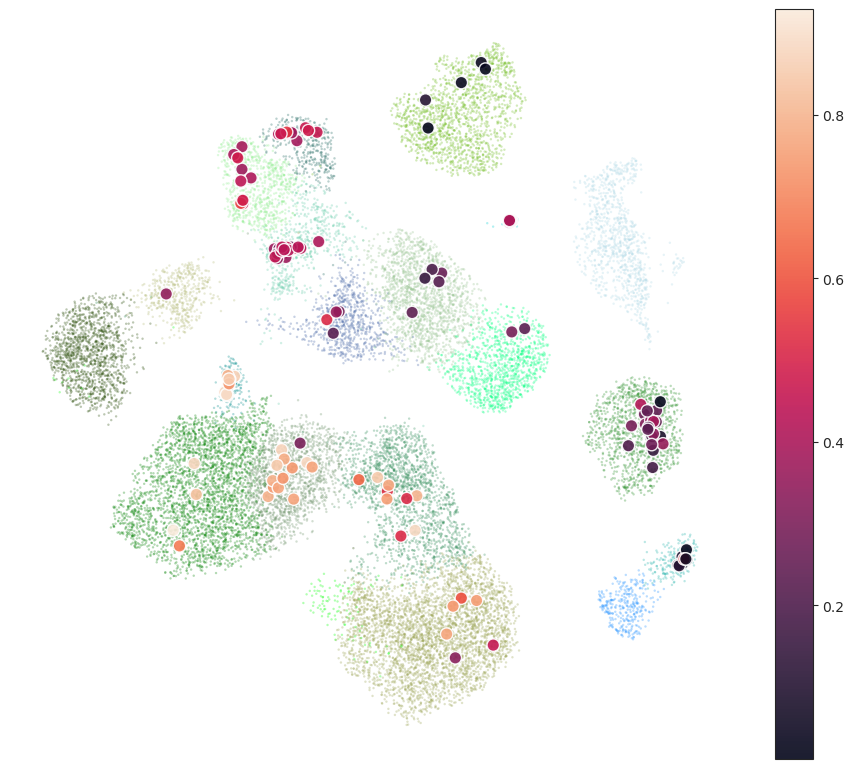

In [9]:
fig = plt.figure(figsize=(15,7.5))
ax1 = plt.axes([0,0,3/5,1])

# plot 10X data
plt.sca(ax1)
plt.scatter(Z0_umap[:,0], Z0_umap[:,1], s=3, alpha=0.3,
            c = clusterColors_Ext, edgecolor='none',
            rasterized=True )
# plot patchseq data (predicted inhibitory cells)
# plt.scatter(mappingUmap_Ext['umap1'], mappingUmap_Ext['umap2'], s=80, alpha=0.9,
#             c = 'grey', edgecolor='w', rasterized=True)
# plot the cells traced morphology.
plt.scatter(mappingUmap_Ext_good['umap1'], mappingUmap_Ext_good['umap2'], s=80, alpha=0.9,
            c = 1-somaDepth_norm_good, edgecolor='w', rasterized=True)
colorbar()

# set figure properties
plt.xticks([])
plt.yticks([])
sns.despine(left=True, bottom=True)
plt.tight_layout()
# plt.savefig('./figures/somaDepth_mapping210X.pdf',dpi=600)

In [10]:
predictClusterIDs = pd.read_csv('../patchSeqMappingTo10X/data/mappingRes/results_Ext.csv',index_col=0)
featureMerged = pd.concat([somaDepth_norm_good,predictClusterIDs],axis=1,join='inner',ignore_index=False)
featureMerged

,somaDepth_norm,patchCellTypeIDs,patchCellSubtypeIDs,patchCellSubtypeNames,mappingRates,predictClustersIDs,mainClusterCorrs
B112,0.796460,1.0,3.0,PC_L5,0.6298,8,0.49
B15,0.922995,1.0,3.0,PC_L5,0.8880,8,0.44
B154,0.758427,1.0,3.0,PC_L5,0.8732,8,0.32
B224,0.823684,1.0,3.0,PC_L5,0.5803,8,0.37
B55,0.740607,1.0,3.0,PC_L5,0.8886,8,0.51
...,...,...,...,...,...,...,...
s722,0.569414,1.0,3.0,PC_L5,0.5333,18,0.92
s725,0.571755,1.0,3.0,PC_L5,0.8231,18,0.74
s727,0.560897,1.0,3.0,PC_L5,0.8577,6,0.85
s732,0.439078,-1.0,0.0,NaN,0.8537,6,0.76


In [11]:
# loading patched cell data
patchSeqData=pickle.load(open('../patchSeqMappingTo10X//data/processedData/insPatchSeqData.pickle', 'rb')) 
# patchSeqData=pickle.load(open('./data/processedData/insPatchData.pickle', 'rb')) 
counts_patchSeq = patchSeqData.counts
genes_patchSeq = patchSeqData.genes.astype('str')
patchCellNames = patchSeqData.cellnames
patchCellTypeIDs = patchSeqData.clustergroupIDs
patchCellTypes = patchSeqData.clustergroupNames
patchCellSubtypeIDs= patchSeqData.clusterIDs
patchCellSubtypes= patchSeqData.clusterNames
mappingRates= patchSeqData.mappingrates

In [12]:
# import the HVGs for mapping. 
tem = pd.read_csv('../patchSeqMappingTo10X/data/mappingRes/HVG_10XExt.csv',index_col=0)
HVG_ext = list(tem['0'])
gg = sorted(list(set(genes_patchSeq) & set(HVG_ext)))
idx_HVG_new = [np.where(genes_patchSeq==g)[0][0] for g in gg]
HVG_new = genes_patchSeq[idx_HVG_new]

In [13]:
counts_patchSeq = counts_patchSeq[:, idx_HVG_new] 

In [14]:
patchDataMtx = pd.DataFrame(counts_patchSeq,index=patchCellNames,columns=HVG_new)
patchDataMtxMerged = pd.concat([featureMerged,patchDataMtx],axis=1,join='inner',ignore_index=False)

In [15]:
patchDataMtxMerged

,somaDepth_norm,patchCellTypeIDs,patchCellSubtypeIDs,patchCellSubtypeNames,mappingRates,predictClustersIDs,mainClusterCorrs,ACSL3,ACTN1,ADCYAP1,...,VSTM2L,VXN,WDR1,WDR83OS,WRB,XRCC5,ZBTB18,ZEB2,ZNF804A,ZRANB2
B112,0.796460,1.0,3.0,PC_L5,0.6298,8,0.49,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0
B15,0.922995,1.0,3.0,PC_L5,0.8880,8,0.44,0.0,2028.0,0.0,...,0.0,2.0,0.0,0.0,13.0,2.0,52.0,0.0,0.0,3218.0
B154,0.758427,1.0,3.0,PC_L5,0.8732,8,0.32,1.0,6453.0,0.0,...,2.0,0.0,95.0,60.0,92.0,1212.0,0.0,0.0,0.0,118.0
B224,0.823684,1.0,3.0,PC_L5,0.5803,8,0.37,659.0,3517.0,4393.0,...,1188.0,8545.0,2857.0,2102.0,660.0,4650.0,235.0,9752.0,32.0,2396.0
B55,0.740607,1.0,3.0,PC_L5,0.8886,8,0.51,6.0,228.0,1.0,...,0.0,749.0,0.0,1.0,2.0,1354.0,0.0,213.0,1.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s722,0.569414,1.0,3.0,PC_L5,0.5333,18,0.92,2.0,2.0,0.0,...,68.0,5316.0,4597.0,163.0,1948.0,0.0,208.0,2.0,0.0,34.0
s725,0.571755,1.0,3.0,PC_L5,0.8231,18,0.74,1944.0,5441.0,0.0,...,177.0,2952.0,2122.0,623.0,804.0,1412.0,445.0,2901.0,0.0,368.0
s727,0.560897,1.0,3.0,PC_L5,0.8577,6,0.85,299.0,2433.0,0.0,...,0.0,51.0,50.0,27.0,3.0,27.0,264.0,450.0,0.0,86.0
s732,0.439078,-1.0,0.0,NaN,0.8537,6,0.76,600.0,3489.0,1002.0,...,1.0,923.0,297.0,34.0,332.0,1440.0,257.0,1697.0,0.0,237.0


In [16]:
# clusters = np.unique(featureMerged['predictClustersIDs'].values)
clusters = np.array([ 0, 1,  2, 4, 5, 6, 8, 14, 15, 16, 17, 18 ]) # only includes the cluster with >5 neurons mapped.
meanSomaDepth = np.ones(len(clusters))*np.nan
meanCounts = np.ones([len(clusters), len(HVG_new)])*np.nan

for i, cluster in enumerate(clusters):
    meanSomaDepth[i] = np.mean(featureMerged.loc[featureMerged['predictClustersIDs']==cluster,'somaDepth_norm'])
    # meanCounts[i] = np.mean( np.log1p(patchDataMtxMerged.loc[patchDataMtxMerged['predictClustersIDs']==cluster,'ACSL3':]),axis=0 )  #'ACSL3'
    meanCounts[i] = np.log1p( np.mean(patchDataMtxMerged.loc[patchDataMtxMerged['predictClustersIDs']==cluster,'ACSL3':],axis=0) )


In [17]:
from scipy.spatial.distance import pdist

Dist_somaDepth = pdist(meanSomaDepth[:,np.newaxis])
Dist_counts = pdist(meanCounts,metric='correlation')


In [18]:
Dist_somaDepth = Dist_somaDepth[~isnan(Dist_somaDepth)]

In [19]:
Dist_counts = Dist_counts[~isnan(Dist_counts)]

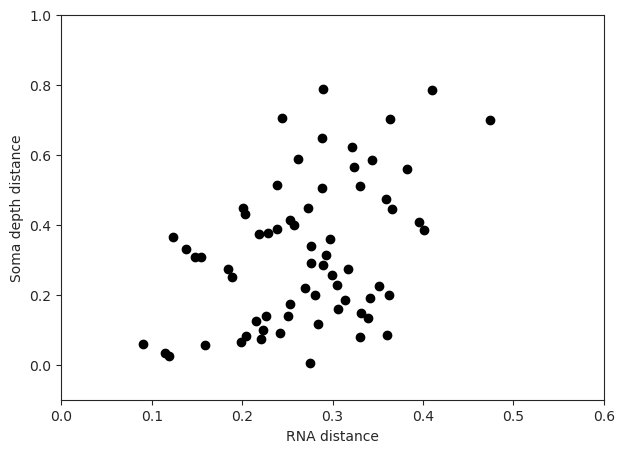

In [20]:
figsize(7,5)
# ax=plt.subplots()
plt.scatter(Dist_counts,Dist_somaDepth,color='k')
plt.ylim([-0.1,1])
plt.xlim([-0,0.6])
plt.xlabel('RNA distance')
plt.ylabel('Soma depth distance')
plt.savefig('./figures/somaDepth_vs_RNA_distance.pdf',dpi=600)